<a href="https://colab.research.google.com/github/smirnovaanastasia1234/smirnova/blob/main/%22%D0%9F%D0%B0%D1%80%D1%81%D0%B8%D0%BD%D0%B3_%D0%A2%D0%B5%D0%BB%D0%B5%D0%B3%D1%80%D0%B0%D0%BC_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install telethon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.6/585.6 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26363 sha256=551fb5b9f3a261a4fcfa749295ab8cee55924f3e2810a301c59fde6e7e51ced2
  Stored in directory: /root/.cache/pip/wheels/aa/ca/9c/8a3c00512585c703edc457db81c066b9609d76758c74f72ac6
Successfully built pyaes


In [2]:
import pandas as pd
from telethon.sync import TelegramClient

In [3]:
api_id = 29319788
api_hash = 'ea963474d7ee9fac389866a196023e84'
phone = 'ваш номер телефона, привязанный к профилю'
 
client = TelegramClient(phone, api_id, api_hash)

In [4]:
await client.start()
print(await client.get_me())

Please enter your phone (or bot token): 89112166840
Please enter the code you received: 80039
Signed in successfully as Настя
User(id=467873563, is_self=True, contact=True, mutual_contact=True, deleted=False, bot=False, bot_chat_history=False, bot_nochats=False, verified=False, restricted=False, min=False, bot_inline_geo=False, support=False, scam=False, apply_min_photo=True, fake=False, bot_attach_menu=False, premium=False, attach_menu_enabled=False, access_hash=6704321895297322793, first_name='Настя', last_name=None, username='smirnova_anastasiya', phone='79112166840', photo=UserProfilePhoto(photo_id=2009501652204234666, dc_id=2, has_video=False, stripped_thumb=b'\x01\x08\x08\x83|D\x19\n\x81\x96\xe9\xed\xe9E\x14R*\xe7'), status=UserStatusOnline(expires=datetime.datetime(2023, 1, 15, 13, 40, 29, tzinfo=datetime.timezone.utc)), bot_info_version=None, restriction_reason=[], bot_inline_placeholder=None, lang_code=None, emoji_status=None, usernames=[])


In [5]:
name = 'Настя' 
chat = 't.me/+KxlX36pb-3hjMjRi'

In [6]:
data = [] 

async with TelegramClient(name, api_id, api_hash) as client:
    async for message in client.iter_messages(chat, limit=100):
        data.append([message.from_id.user_id, message.text])


df = pd.DataFrame(data, columns=['user_id', 'text'])

Please enter your phone (or bot token): 89112166840
Please enter the code you received: 54147
Signed in successfully as Настя


In [7]:
df

,user_id,text
0,355018531,"Да, зачет"
1,880582901,все равно только зачет? Оценки же не будет?
2,1142697803,Хорошо. Затянул с оформлением первых задач и т...
3,1001969626,Что поставили? Отл? ))
4,1142697803,"Вопрос снимается, оценку только что поставили)"
...,...,...
95,1343176574,"тоже красиво стал писать, в итоге только 3 успел"
96,583625723,"Я чёт взялся переписывать красиво, в итоге 6ю ..."
97,827053482,тоже наверно
98,538084910,https://us02web.zoom.us/j/84412449735?pwd=VmNW...


Обучение

In [8]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 19.5 MB/s eta 0:00:00


In [9]:
from transformers import pipeline

In [10]:
model=pipeline("sentiment-analysis",   
                      "blanchefort/rubert-base-cased-sentiment")

Downloading:   0%|          | 0.00/943 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/712M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [11]:
df_model = df.copy()

In [14]:
lst = []
for i in df_model["text"]:
  lst.append(model(str(i))[0]["label"])
df_model["Sentinent"]=pd.DataFrame(lst)
df_model
  

,user_id,text,Sentinent
0,355018531,"Да, зачет",POSITIVE
1,880582901,все равно только зачет? Оценки же не будет?,NEUTRAL
2,1142697803,Хорошо. Затянул с оформлением первых задач и т...,POSITIVE
3,1001969626,Что поставили? Отл? )),NEUTRAL
4,1142697803,"Вопрос снимается, оценку только что поставили)",NEUTRAL
...,...,...,...
95,1343176574,"тоже красиво стал писать, в итоге только 3 успел",NEGATIVE
96,583625723,"Я чёт взялся переписывать красиво, в итоге 6ю ...",NEGATIVE
97,827053482,тоже наверно,NEUTRAL
98,538084910,https://us02web.zoom.us/j/84412449735?pwd=VmNW...,NEGATIVE


Графики

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Самые негативные user_id\t')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


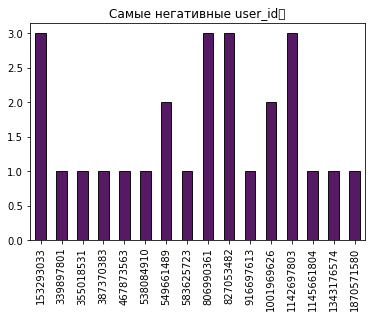

In [16]:
df_N = df_model[df_model["Sentinent"]=="NEGATIVE"]
df_n =df_N.user_id.value_counts().sort_index()
df_n.plot.bar(edgecolor='k', alpha=0.9, stacked = True, cmap="viridis")
plt.title("Самые негативные user_id	")

In [17]:
df_N

,user_id,text,Sentinent
5,1142697803,"Что-то хрень какая-то, сдавал в 1й группе и до...",NEGATIVE
6,355018531,До понедельника все проверит,NEGATIVE
9,549661489,https://t.me/+AIl6pf1c2KpjOGQy,NEGATIVE
19,153293033,формулировка (были попытки сделать),NEGATIVE
29,153293033,и мне пришло,NEGATIVE
32,1001969626,дддаааа!!!!!!!!!!!!!,NEGATIVE
34,827053482,Сдали¿,NEGATIVE
36,1001969626,О! И мне пришло!,NEGATIVE
40,387370383,"угу, мне пришел",NEGATIVE
42,1145661804,С. И. в конце разбора задач сказал про февраль...,NEGATIVE


Text(0.5, 1.0, 'Самые позитивные user_id')

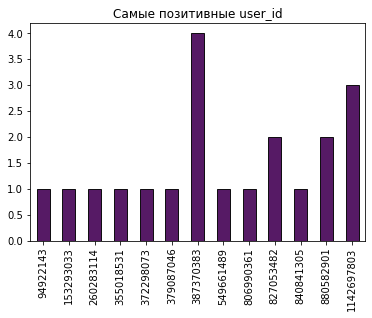

In [18]:
df_P = df_model[df_model["Sentinent"]=="POSITIVE"]
df_p =df_P.user_id.value_counts().sort_index()
df_p.plot.bar(edgecolor='k', alpha=0.9, stacked = True, cmap="viridis")
plt.title("Самые позитивные user_id")

In [19]:
df_P

,user_id,text,Sentinent
0,355018531,"Да, зачет",POSITIVE
2,1142697803,Хорошо. Затянул с оформлением первых задач и т...,POSITIVE
11,880582901,Спасибо! получилось! ),POSITIVE
13,94922143,"4 не надо, 5 надо, и 9 надо\nостальные верно с...",POSITIVE
15,880582901,"Напомните плиз по линуксу, что тут делаю не та...",POSITIVE
16,387370383,🥲,POSITIVE
17,260283114,"У меня проверили, все 6 верно 🤓",POSITIVE
18,153293033,с вероятностью 0.9 сдал,POSITIVE
22,387370383,🤷‍♂,POSITIVE
25,387370383,наверное. у меня 70%. хорошо указано,POSITIVE


Text(0.5, 1.0, 'Количество видов сообщений')

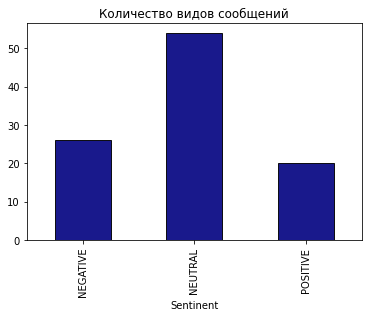

In [20]:
df_s = df_model.groupby(["Sentinent"])["user_id"].count()
df_s.plot.bar(edgecolor='k', color = "navy", alpha=0.9)
plt.title("Количество видов сообщений")